In [20]:
from osgeo import gdal
import matplotlib.pyplot as plt
import rasterio as rs
from rasterio.plot import show
import geopandas as gpd



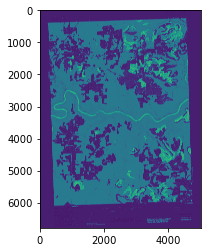

In [11]:
# dataset = gdal.Open('Dsm13/o41078a2.tif', gdal.GA_ReadOnly) 
# # Note GetRasterBand() takes band no. starting from 1 not 0
# band = dataset.GetRasterBand(1)
# arr = band.ReadAsArray()
# plt.imshow(arr)

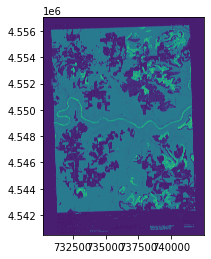

<AxesSubplot:>

In [5]:
# fp = r'Dsm13/o41078a2.tif'
# img = rasterio.open(fp)
# show(img)

In [14]:

import numpy as np
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

dst_crs = 'EPSG:4326'

with rasterio.open('Dsm13/DHMVIIDSMRAS1m_k13.tif') as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })

    with rasterio.open('Dsm13/DHMVIIDSMRAS1m_k13.tif', 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
                source=rasterio.band(src, i),
                destination=rasterio.band(dst, i),
                src_transform=src.transform,
                src_crs=src.crs,
                dst_transform=transform,
                dst_crs=dst_crs,
                resampling=Resampling.nearest)


C:\Users\maryame\anaconda3\envs\Maryelo\lib\site-packages\matplotlib\image.py:446: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\maryame\anaconda3\envs\Maryelo\lib\site-packages\matplotlib\image.py:453: UserWarning: Warning: converting a masked element to nan.
  a_min = np.float64(newmin)
C:\Users\maryame\anaconda3\envs\Maryelo\lib\site-packages\matplotlib\image.py:458: UserWarning: Warning: converting a masked element to nan.
  a_max = np.float64(newmax)
C:\Users\maryame\anaconda3\envs\Maryelo\lib\site-packages\matplotlib\image.py:478: UserWarning: Warning: converting a masked element to nan.
  dtype=scaled_dtype)


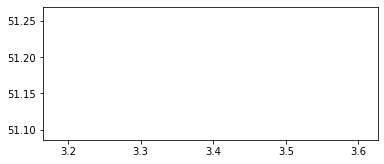

<AxesSubplot:>

In [15]:
fp = r'Dsm13/DHMVIIDSMRAS1m_k13.tif'
img = rasterio.open(fp)
show(img)

In [51]:
import fiona
import rasterio
import rasterio.plot
import matplotlib as mpl
from descartes import PolygonPatch



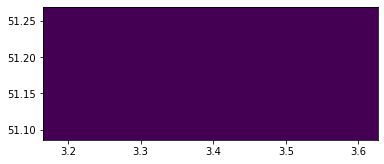

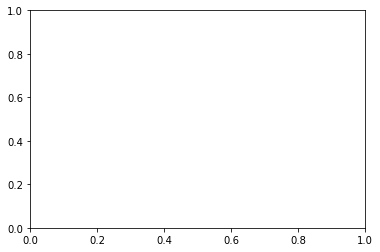

In [52]:
src = rasterio.open("Dsm13/DHMVIIDSMRAS1m_k13.tif")

with fiona.open("Dsm13/DHMVII_vdc_k13.shp", "r") as shapefile:
    features = [feature["geometry"] for feature in shapefile]

rasterio.plot.show((src, 1))
ax = mpl.pyplot.gca()

patches = [PolygonPatch(feature) for feature in features]
ax.add_collection(mpl.collections.PatchCollection(patches))

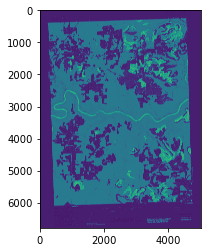

In [53]:
def get_extent(dataset):

    cols = dataset.RasterXSize
    rows = dataset.RasterYSize
    transform = dataset.GetGeoTransform()
    minx = transform[0]
    maxx = transform[0] + cols * transform[1] + rows * transform[2]

    miny = transform[3] + cols * transform[4] + rows * transform[5]
    maxy = transform[3]

    return {
            "minX": str(minx), "maxX": str(maxx),
            "minY": str(miny), "maxY": str(maxy),
            "cols": str(cols), "rows": str(rows)
            }

def create_tiles(minx, miny, maxx, maxy, n):
    width = maxx - minx
    height = maxy - miny

    matrix = []

    for j in range(n, 0, -1):
        for i in range(0, n):

            ulx = minx + (width/n) * i # 10/5 * 1
            uly = miny + (height/n) * j # 10/5 * 1

            lrx = minx + (width/n) * (i + 1)
            lry = miny + (height/n) * (j - 1)
            matrix.append([[ulx, uly], [lrx, lry]])

    return matrix


def split(file_name, n):
    raw_file_name = os.path.splitext(os.path.basename(Dsm13/DHMVIIDSMRAS1m_k13.tif))[0].replace("Dsm13/DHMVIIDSMRAS1m_k13.tif", "")
    driver = gdal.GetDriverByName('GTiff')
    dataset = gdal.Open(Dsm13/DHMVIIDSMRAS1m_k13.tif)
    band = dataset.GetRasterBand(1)
    transform = dataset.GetGeoTransform()

    extent = get_extent(dataset)

    cols = int(extent["cols"])
    rows = int(extent["rows"])

    print("Columns: ", cols)
    print("Rows: ", rows)

    minx = float(extent["minX"])
    maxx = float(extent["maxX"])
    miny = float(extent["minY"])
    maxy = float(extent["maxY"])

    width = maxx - minx
    height = maxy - miny

    output_path = os.path.join("data", raw_file_name)
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    print ("GCD", gcd(round(width, 0), round(height, 0)))
    print ("Width", width)
    print ("height", height)


    tiles = create_tiles(minx, miny, maxx, maxy, n)
    transform = dataset.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = -transform[5]

    print (xOrigin, yOrigin)

    tile_num = 0
    for tile in tiles:

        minx = tile[0][0]
        maxx = tile[1][0]
        miny = tile[1][1]
        maxy = tile[0][1]

        p1 = (minx, maxy)
        p2 = (maxx, miny)

        i1 = int((p1[0] - xOrigin) / pixelWidth)
        j1 = int((yOrigin - p1[1])  / pixelHeight)
        i2 = int((p2[0] - xOrigin) / pixelWidth)
        j2 = int((yOrigin - p2[1]) / pixelHeight)

        print (i1, j1)
        print (i2, j2)

        new_cols = i2-i1
        new_rows = j2-j1

        data = band.ReadAsArray(i1, j1, new_cols, new_rows)

        #print data

        new_x = xOrigin + i1*pixelWidth
        new_y = yOrigin - j1*pixelHeight

        print (new_x, new_y)

        new_transform = (new_x, transform[1], transform[2], new_y, transform[4], transform[5])

#         output_file_base = raw_file_name + "_" + str(tile_num) + ".tif"
        output_file = os.path.join("data", raw_file_name, output_file_base)

        dst_ds = driver.Create(output_file,
                               new_cols,
                               new_rows,
                               1,
                               gdal.GDT_Float32)

        #writting output raster
        dst_ds.GetRasterBand(1).WriteArray( data )

        tif_metadata = {
            "minX": str(minx), "maxX": str(maxx),
            "minY": str(miny), "maxY": str(maxy)
        }
        dst_ds.SetMetadata(tif_metadata)

        #setting extension of output raster
        # top left x, w-e pixel resolution, rotation, top left y, rotation, n-s pixel resolution
        dst_ds.SetGeoTransform(new_transform)

        wkt = dataset.GetProjection()

        # setting spatial reference of output raster
        srs = osr.SpatialReference()
        srs.ImportFromWkt(wkt)
        dst_ds.SetProjection( srs.ExportToWkt() )

        #Close output raster dataset
        dst_ds = None

        tile_num += 1

    dataset = None

# Note GetRasterBand() takes band no. starting from 1 not 0
    band = dataset.GetRasterBand(1)
    arr = band.ReadAsArray()
plt.imshow(arr)

In [1]:
import rasterio
from rasterio.coords import BoundingBox
from rasterio import windows
from rasterio import warp
from rasterio import mask
import numpy as np
import matplotlib.pyplot as plt
import rasterio.plot as plot
from matplotlib.patches import Rectangle

In [2]:
from osgeo import gdal

In [4]:
image = gdal.Open('Dsm13/o41078a2.tif')

In [19]:
img =image.GetRasterBand(1)
img.GetStatistics( True, True )

[0.0, 12.0, 3.094859725640915, 2.330389470888221]

In [4]:
from shapely.geometry import MultiPoint
print (MultiPoint.bounds)

In [2]:
from shapely.geometry import box
# box(minx, miny, maxx, maxy, ccw=True)
b = box(2, 30, 5, 33)
b.wkt  # POLYGON ((5 30, 5 33, 2 33, 2 30, 5 30))
b.area  # 9.0

9.0

In [6]:
import rasterio
from rasterio.enums import Resampling

upscale_factor = 2

    

In [ ]:
with rasterio.open("http://localhost:8888/edit/Desktop/GitHub-Repo's/3D-House-MEO/Dsm13/DHMVIIDSMRAS1m_k13.tif") as dataset:

    # resample data to target shape
    data = dataset.read(out_shape=(dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # scale image transform
    transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])